In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

# shuffle before splitting into dev and training sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T # transposing as well
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([7, 0, 0, ..., 7, 0, 8], shape=(41000,))

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train,0.10, 500)

Iteration:  0
[7 4 7 ... 0 4 2] [7 0 0 ... 7 0 8]
0.13890243902439026
Iteration:  10
[7 0 3 ... 7 4 8] [7 0 0 ... 7 0 8]
0.23165853658536587
Iteration:  20
[6 0 3 ... 7 4 3] [7 0 0 ... 7 0 8]
0.3111951219512195
Iteration:  30
[6 0 3 ... 7 4 3] [7 0 0 ... 7 0 8]
0.3978536585365854
Iteration:  40
[1 0 3 ... 7 4 3] [7 0 0 ... 7 0 8]
0.4701951219512195
Iteration:  50
[1 0 3 ... 7 4 3] [7 0 0 ... 7 0 8]
0.5299024390243903
Iteration:  60
[1 0 3 ... 7 0 3] [7 0 0 ... 7 0 8]
0.5764634146341463
Iteration:  70
[1 0 0 ... 7 0 3] [7 0 0 ... 7 0 8]
0.6106829268292683
Iteration:  80
[1 0 0 ... 7 0 8] [7 0 0 ... 7 0 8]
0.6376829268292683
Iteration:  90
[1 0 0 ... 7 0 8] [7 0 0 ... 7 0 8]
0.6596829268292683
Iteration:  100
[1 0 0 ... 7 0 8] [7 0 0 ... 7 0 8]
0.6787560975609757
Iteration:  110
[1 0 0 ... 7 0 8] [7 0 0 ... 7 0 8]
0.6945365853658536
Iteration:  120
[1 0 0 ... 7 0 8] [7 0 0 ... 7 0 8]
0.7079512195121951
Iteration:  130
[1 0 0 ... 7 0 8] [7 0 0 ... 7 0 8]
0.7193658536585366
Iteration:  140

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


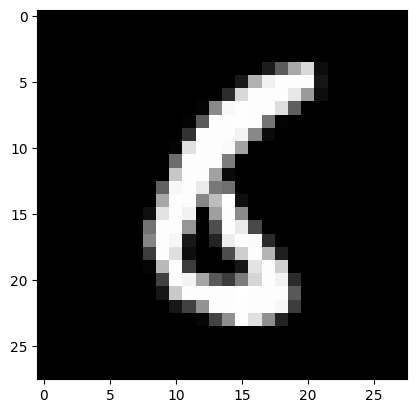

In [8]:
test_prediction(5,W1,b1,W2,b2)

Prediction:  [7]
Label:  7


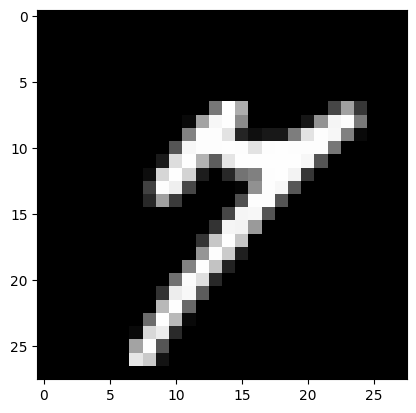

In [9]:
test_prediction(23,W1,b1,W2,b2)

Prediction:  [5]
Label:  5


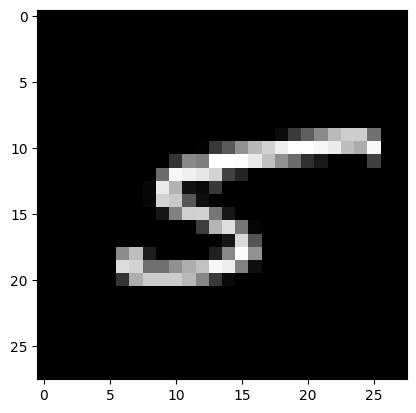

In [10]:
test_prediction(500,W1,b1,W2,b2)

Prediction:  [0]
Label:  0


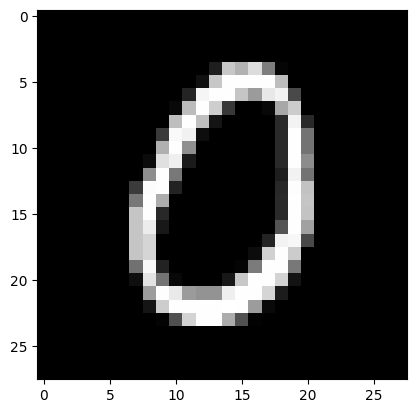

In [11]:
test_prediction(5555,W1,b1,W2,b2)

In [12]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[0 0 6 1 3 1 2 0 4 2 6 2 0 3 2 3 4 7 4 1 6 0 1 3 6 3 0 9 6 3 8 3 1 3 0 0 0
 5 6 6 7 0 9 4 5 0 7 8 3 2 4 5 5 7 7 9 7 2 5 9 2 1 7 2 2 1 8 1 6 9 4 5 6 8
 2 1 1 0 6 1 0 0 1 9 3 6 8 7 9 1 5 9 0 0 4 2 8 8 1 7 1 2 9 9 2 3 2 7 0 1 9
 4 5 9 2 8 3 7 6 7 5 7 9 4 8 7 0 7 8 4 7 9 8 4 7 1 1 7 7 1 8 4 1 9 6 6 1 2
 0 0 7 8 5 1 8 8 3 9 1 3 6 1 4 1 8 8 4 9 6 7 7 3 9 1 7 3 3 7 4 6 2 4 0 0 4
 8 6 6 3 5 0 0 0 2 9 3 3 6 7 2 8 6 3 1 7 8 2 4 3 7 3 7 3 0 7 8 5 8 9 1 2 6
 2 2 2 6 9 0 6 4 7 9 3 0 7 2 9 0 8 6 0 3 6 5 0 1 0 8 8 9 9 4 1 2 2 9 1 4 7
 9 0 1 9 3 0 9 5 4 0 6 4 3 1 5 1 5 5 2 6 5 4 1 7 5 1 6 4 2 1 2 6 4 7 7 8 0
 5 4 6 7 5 6 1 0 7 9 2 2 8 2 2 4 6 6 8 2 3 2 4 4 5 6 5 4 5 5 8 1 5 1 4 4 0
 6 6 4 2 7 3 5 0 0 1 1 2 8 7 8 4 1 2 5 3 9 4 1 2 2 9 7 0 6 6 5 7 9 1 6 7 8
 5 1 3 8 1 4 1 7 0 6 9 0 7 4 1 0 2 6 9 0 5 1 4 6 1 9 9 8 2 9 9 0 0 6 7 1 0
 0 6 4 8 5 4 8 8 7 0 0 7 1 7 5 7 7 6 7 0 0 1 7 1 2 6 5 1 3 1 6 5 9 1 3 5 5
 2 8 8 1 8 1 6 0 1 2 4 1 0 1 4 4 9 3 1 8 2 6 0 2 6 8 0 7 7 0 4 9 9 6 1 4 5
 1 6 9 8 6 1 0 1 4 7 4 2 

np.float64(0.856)